In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
openai_35 = pd.read_csv('results/openai-3.5-turbo.csv')
openai_4 = pd.read_csv('results/openai-4.csv')
palm = pd.read_csv('results/palm.csv')
cohere = pd.read_csv('results/cohere.csv')

In [11]:
openai_35

,Unnamed: 0,task_id,test_type,passed,result,solution,completion_id
0,0,SynbioEval/0,regular,False,B. E. coli cells have a chromosome.,D. E. coli cells have a peptidoglycan layer be...,1
1,1,SynbioEval/0,cot,False,B. E. coli cells have a chromosome.,D. E. coli cells have a peptidoglycan layer be...,1
2,2,SynbioEval/1,regular,False,"A. They contribute to nucleic acid, polysaccha...",B. These reactions are exergonic.,1
3,3,SynbioEval/1,cot,False,D. These reactions are restricted to the lysos...,B. These reactions are exergonic.,1
4,4,SynbioEval/2,regular,True,C. Uridine 5’ triphosphate,C. Uridine 5’ triphosphate,1
...,...,...,...,...,...,...,...
181,181,SynbioEval/28,cot,True,Methane,Methane,3
182,182,SynbioEval/29,regular,False,CCO,Ethanol,3
183,183,SynbioEval/29,cot,False,CCO,Ethanol,3
184,184,SynbioEval/30,regular,False,12,10,3


          task_id  color
0    SynbioEval/0  white
1    SynbioEval/1  white
2    SynbioEval/2    red
3    SynbioEval/3    red
4    SynbioEval/4    red
5    SynbioEval/5    red
6    SynbioEval/6    red
7    SynbioEval/7  white
8    SynbioEval/8  white
9    SynbioEval/9    red
10  SynbioEval/10    red
11  SynbioEval/11  white
12  SynbioEval/12    red
13  SynbioEval/13    red
14  SynbioEval/14    red
15  SynbioEval/15    red
16  SynbioEval/16  white
17  SynbioEval/17  white
18  SynbioEval/18  white
19  SynbioEval/19    red
20  SynbioEval/20  white
21  SynbioEval/21  white
22  SynbioEval/22  white
23  SynbioEval/23  white
24  SynbioEval/24  white
25  SynbioEval/25  white
26  SynbioEval/26  white
27  SynbioEval/27  white
28  SynbioEval/28    red
29  SynbioEval/29  white
30  SynbioEval/30  white


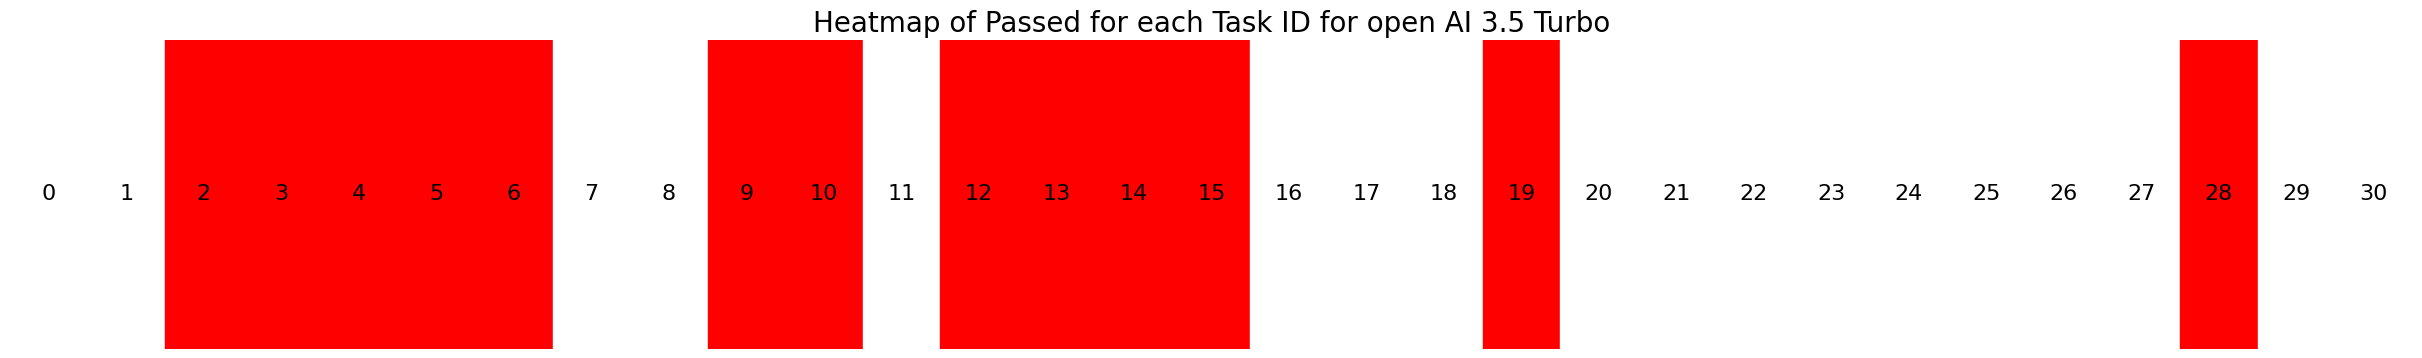

In [29]:
heatmap_data = pd.DataFrame()
df_list = [openai_35, openai_4, palm, cohere]
counts_data = pd.DataFrame()

merged_df = openai_35
# Concatenate dataframes along rows
unique_task_ids = merged_df['task_id'].unique()

# Create a list to store color values (red if at least one True, white otherwise)
colors = ['red' if merged_df[merged_df['task_id'] == task_id]['passed'].any() else 'white' for task_id in unique_task_ids]

# Create a dataframe with only task_id and passed columns
heatmap_data = pd.DataFrame(data={'task_id': unique_task_ids, 'color': colors})
print(heatmap_data)
# Create a heatmap
plt.figure(figsize=(len(unique_task_ids), 4))
sns.heatmap([[1] * len(unique_task_ids)], cmap=["white", "red"], cbar=False, linewidths=0, annot=False)

# Hide axes
plt.axis('off')

# Plot a colored box for each task_id and display the task_id as label

for i, row in heatmap_data.iterrows():
    plt.text(i + 0.5, 0.5, row['task_id'].split("/")[1], ha='center', va='center', color='black', fontsize=16)
    plt.fill_betweenx(y=[0, 1], x1=i, x2=i + 1, color=row['color'])

plt.title('Heatmap of Passed for each Task ID for open AI 3.5 Turbo', fontsize=20)
plt.show()

          task_id  color
0    SynbioEval/0    red
1    SynbioEval/1    red
2    SynbioEval/2    red
3    SynbioEval/3    red
4    SynbioEval/4    red
5    SynbioEval/5    red
6    SynbioEval/6    red
7    SynbioEval/7  white
8    SynbioEval/8    red
9    SynbioEval/9    red
10  SynbioEval/10    red
11  SynbioEval/11    red
12  SynbioEval/12    red
13  SynbioEval/13    red
14  SynbioEval/14    red
15  SynbioEval/15    red
16  SynbioEval/16    red
17  SynbioEval/17  white
18  SynbioEval/18  white
19  SynbioEval/19    red
20  SynbioEval/20  white
21  SynbioEval/21  white
22  SynbioEval/22    red
23  SynbioEval/23  white
24  SynbioEval/24  white
25  SynbioEval/25  white
26  SynbioEval/26  white
27  SynbioEval/27  white
28  SynbioEval/28    red
29  SynbioEval/29    red
30  SynbioEval/30    red


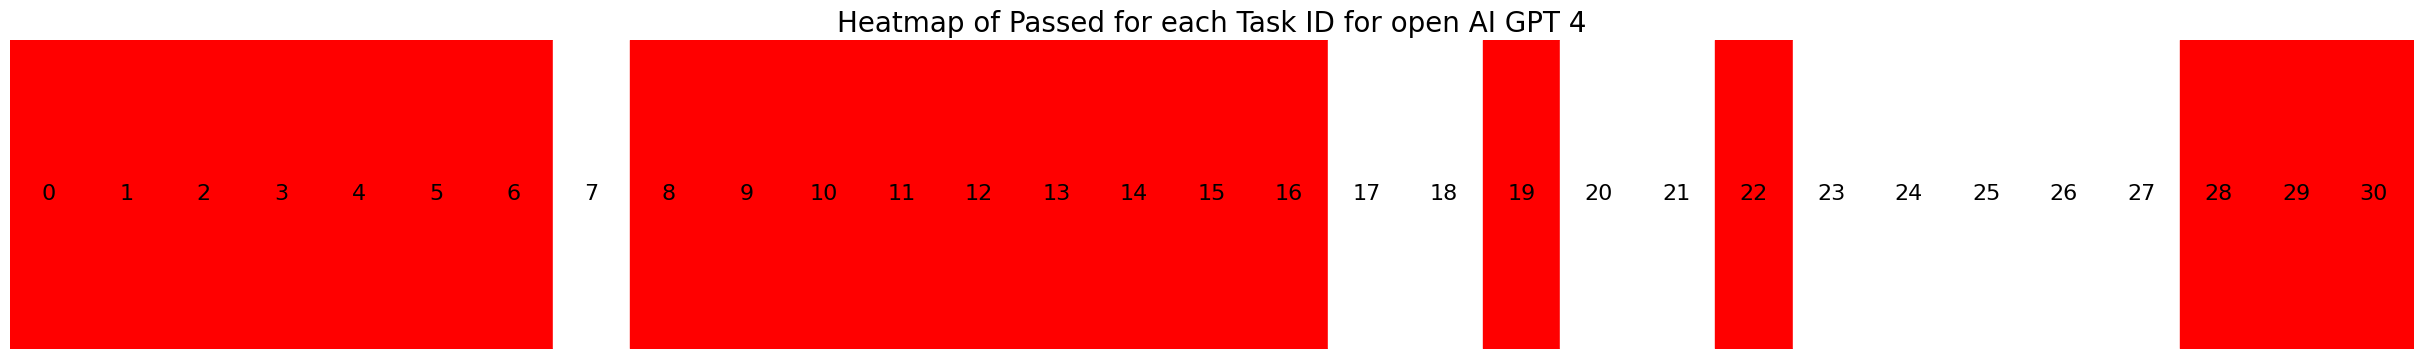

In [30]:
merged_df = openai_4
# Concatenate dataframes along rows
unique_task_ids = merged_df['task_id'].unique()

# Create a list to store color values (red if at least one True, white otherwise)
colors = ['red' if merged_df[merged_df['task_id'] == task_id]['passed'].any() else 'white' for task_id in unique_task_ids]

# Create a dataframe with only task_id and passed columns
heatmap_data = pd.DataFrame(data={'task_id': unique_task_ids, 'color': colors})
print(heatmap_data)
# Create a heatmap
plt.figure(figsize=(len(unique_task_ids), 4))
sns.heatmap([[1] * len(unique_task_ids)], cmap=["white", "red"], cbar=False, linewidths=0, annot=False)

# Hide axes
plt.axis('off')

# Plot a colored box for each task_id and display the task_id as label

for i, row in heatmap_data.iterrows():
    plt.text(i + 0.5, 0.5, row['task_id'].split("/")[1], ha='center', va='center', color='black', fontsize=16)
    plt.fill_betweenx(y=[0, 1], x1=i, x2=i + 1, color=row['color'])

plt.title('Heatmap of Passed for each Task ID for open AI GPT 4', fontsize=20)
plt.show()

True
True
False
True
True
False
False
False
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True


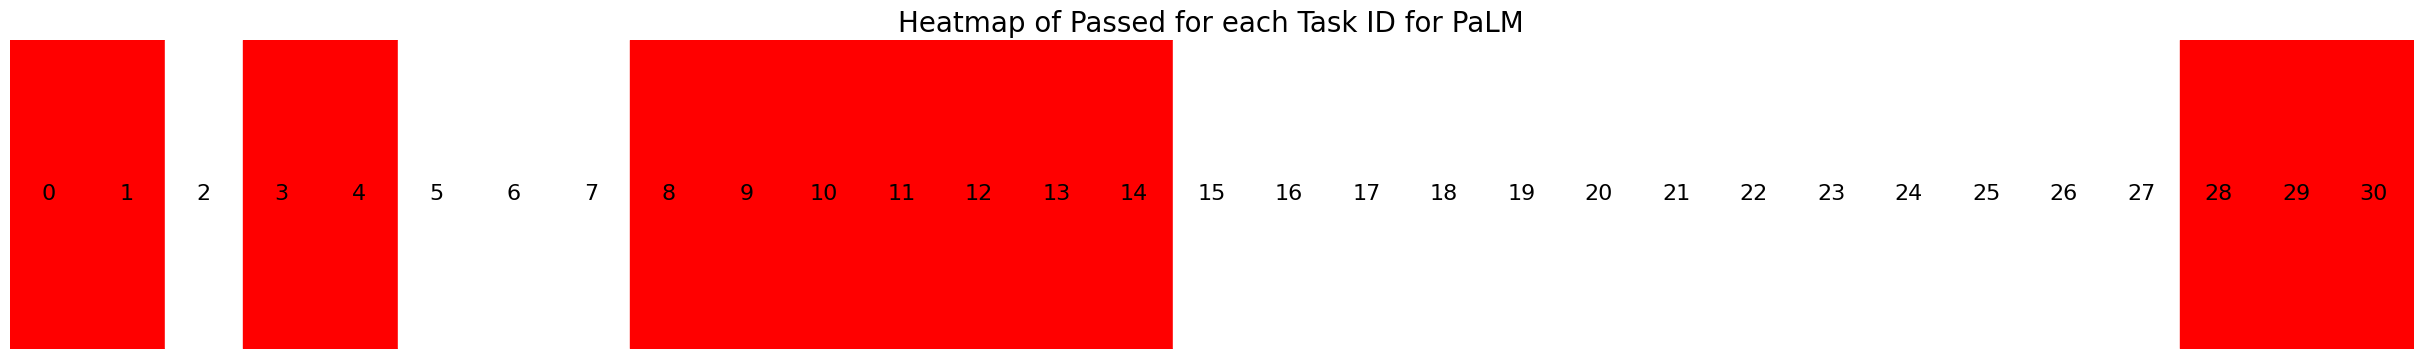

In [47]:
merged_df = palm
# Concatenate dataframes along rows
unique_task_ids = merged_df['task_id'].unique()
# Create a list to store color values (red if at least one True, white otherwise)
for task_id in unique_task_ids:
    print((merged_df[merged_df['task_id'] == task_id]['passed'] == "TRUE").any())
colors = ['red' if (merged_df[merged_df['task_id'] == task_id]['passed'] == "TRUE").any() else 'white' for task_id in unique_task_ids]
# print(merged_df)
# Create a dataframe with only task_id and passed columns
heatmap_data = pd.DataFrame(data={'task_id': unique_task_ids, 'color': colors})

# Create a heatmap
plt.figure(figsize=(len(unique_task_ids), 4))
sns.heatmap([[1] * len(unique_task_ids)], cmap=["white", "red"], cbar=False, linewidths=0, annot=False)

# Hide axes
plt.axis('off')

# Plot a colored box for each task_id and display the task_id as label

for i, row in heatmap_data.iterrows():
    plt.text(i + 0.5, 0.5, row['task_id'].split("/")[1], ha='center', va='center', color='black', fontsize=16)
    plt.fill_betweenx(y=[0, 1], x1=i, x2=i + 1, color=row['color'])

plt.title('Heatmap of Passed for each Task ID for PaLM', fontsize=20)
plt.show()

          task_id  color
0    SynbioEval/0  white
1    SynbioEval/1  white
2    SynbioEval/2    red
3    SynbioEval/3    red
4    SynbioEval/4    red
5    SynbioEval/5    red
6    SynbioEval/6  white
7    SynbioEval/7  white
8    SynbioEval/8    red
9    SynbioEval/9    red
10  SynbioEval/10  white
11  SynbioEval/11  white
12  SynbioEval/12    red
13  SynbioEval/13  white
14  SynbioEval/14  white
15  SynbioEval/15  white
16  SynbioEval/16  white
17  SynbioEval/17  white
18  SynbioEval/18  white
19  SynbioEval/19  white
20  SynbioEval/20  white
21  SynbioEval/21  white
22  SynbioEval/22  white
23  SynbioEval/23  white
24  SynbioEval/24  white
25  SynbioEval/25  white
26  SynbioEval/26  white
27  SynbioEval/27  white
28  SynbioEval/28    red
29  SynbioEval/29    red
30  SynbioEval/30  white


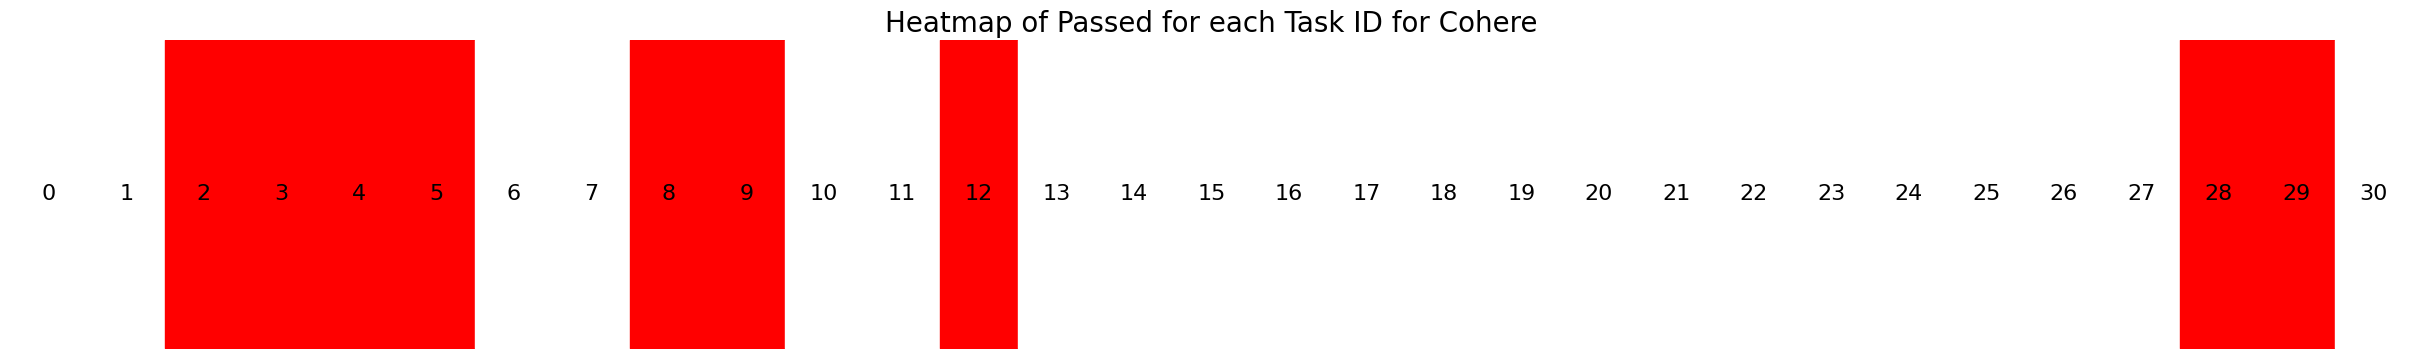

In [33]:
merged_df = cohere
# Concatenate dataframes along rows
unique_task_ids = merged_df['task_id'].unique()

# Create a list to store color values (red if at least one True, white otherwise)
colors = ['red' if merged_df[merged_df['task_id'] == task_id]['passed'].any() else 'white' for task_id in unique_task_ids]

# Create a dataframe with only task_id and passed columns
heatmap_data = pd.DataFrame(data={'task_id': unique_task_ids, 'color': colors})
print(heatmap_data)
# Create a heatmap
plt.figure(figsize=(len(unique_task_ids), 4))
sns.heatmap([[1] * len(unique_task_ids)], cmap=["white", "red"], cbar=False, linewidths=0, annot=False)

# Hide axes
plt.axis('off')

# Plot a colored box for each task_id and display the task_id as label

for i, row in heatmap_data.iterrows():
    plt.text(i + 0.5, 0.5, row['task_id'].split("/")[1], ha='center', va='center', color='black', fontsize=16)
    plt.fill_betweenx(y=[0, 1], x1=i, x2=i + 1, color=row['color'])

plt.title('Heatmap of Passed for each Task ID for Cohere', fontsize=20)
plt.show()